In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

sns.set(rc={"lines.linewidth": 2.5,"figure.figsize":(8,6)},font_scale=1.25)
sns.set_context("notebook")
sns.set_style("whitegrid")

rng = np.random.default_rng()

/Users/cygnari/.local/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
problem_sizes1 = np.array([2562, 10242, 40962])
problem_sizes2 = np.array([2562, 10242, 40962, 163842])
direct_times = np.array([1210758, 19340370, 294149834])
fast_times = np.array([326008, 1791882, 10251249, 49296519])
x_vals1 = np.mgrid[2562:40962:101j]
x_vals2 = np.mgrid[2562:163842:101j]

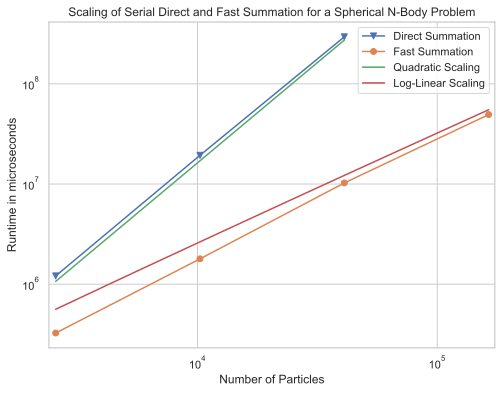

In [9]:
plt.plot(problem_sizes1, direct_times, label='Direct Summation', marker='v')
plt.plot(problem_sizes2, fast_times, label='Fast Summation', marker='o')
plt.plot(x_vals1, np.square(x_vals1) * 250000 / (2562 * 600), label='Quadratic Scaling')
plt.plot(x_vals2, x_vals2 * np.log(x_vals2) * 28, label='Log-Linear Scaling')
plt.xlim(2400, 163842+10000)
plt.xlabel('Number of Particles')
plt.ylabel('Runtime in microseconds')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Scaling of Serial Direct and Fast Summation for a Spherical N-Body Problem')
# plt.show()
plt.savefig('serialbaseline.png', dpi=1200)

In [10]:
thread_counts1 = np.array([1, 2, 4, 10, 20])
thread_counts2 = np.array([1, 2, 4, 8, 16, 36])
direct_times_mpi = np.array([1027426, 512106, 257250, 140475, 66501, 33120])
fast_times_mpi = np.array([389057, 189165, 93752, 38744, 21059])
direct_times_omp = np.array([1206218, 608791, 305288, 153408, 78109, 39055])
fast_times_omp = np.array([433219, 206851, 113017, 57146, 40966])
x_vals = np.mgrid[1:36:1]

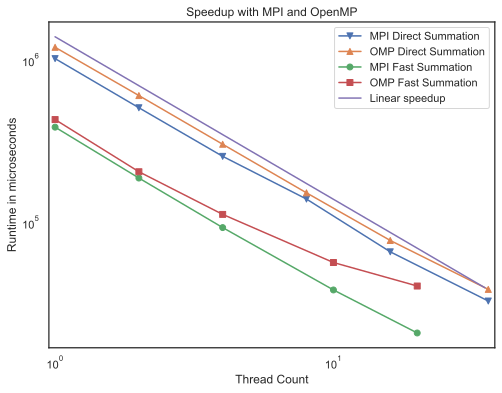

In [103]:
plt.plot(thread_counts2, direct_times_mpi, label='MPI Direct Summation', marker='v')
plt.plot(thread_counts2, direct_times_omp, label='OMP Direct Summation', marker='^')
plt.plot(thread_counts1, fast_times_mpi, label='MPI Fast Summation', marker='o')
plt.plot(thread_counts1, fast_times_omp, label='OMP Fast Summation', marker='s')
plt.plot(x_vals, 1400000 / x_vals, label='Linear speedup')
plt.xlim(0.95, 38)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Thread Count')
plt.ylabel('Runtime in microseconds')
plt.title('Speedup with MPI and OpenMP')
plt.legend()
# plt.show()
plt.savefig('speedupmpiomp.png')

In [104]:
problem_sizes3 = np.array([2562, 10242, 40962, 163842, 655362])
direct_mpi = np.array([33120, 486696, 7932853, 134210358])
fast_mpi = np.array([21059, 108988, 1010554, 4412965, 19301556])
direct_omp = np.array([39055, 631099, 8902968, 143710504])
fast_omp = np.array([40966, 201319, 1186067, 5163857, 21706990])
cuda = np.array([3704, 14691, 75800, 247823, 233194])
x_vals3 = np.mgrid[2562:655362:101j]

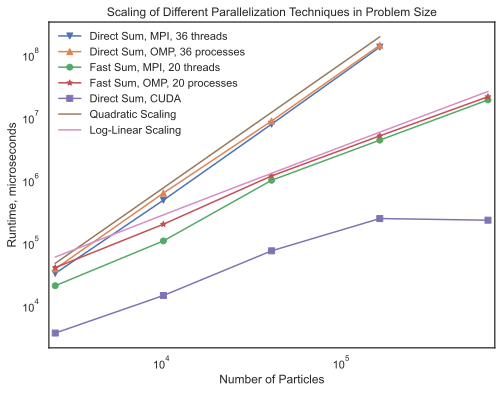

In [128]:
plt.plot(problem_sizes2, direct_mpi, label='Direct Sum, MPI, 36 threads', marker='v')
plt.plot(problem_sizes2, direct_omp, label='Direct Sum, OMP, 36 processes', marker='^')
plt.plot(problem_sizes3, fast_mpi, label='Fast Sum, MPI, 20 threads', marker='o')
plt.plot(problem_sizes3, fast_omp, label='Fast Sum, OMP, 20 processes', marker='*')
plt.plot(problem_sizes3, cuda, label='Direct Sum, CUDA', marker='s')
plt.plot(x_vals2, np.square(x_vals2) * 280000 / (2562 * 15000), label='Quadratic Scaling')
plt.plot(x_vals3, x_vals3 * np.log(x_vals3) * 3, label='Log-Linear Scaling')
plt.xscale('log')
plt.yscale('log')
plt.xlim(2362, 715362)
plt.legend(loc='upper left',frameon=False)
plt.xlabel('Number of Particles')
plt.ylabel('Runtime, microseconds')
plt.title('Scaling of Different Parallelization Techniques in Problem Size')
# plt.show()
plt.savefig('parallelscaling.png')

In [129]:
direct_mpi_eff = np.array([1.178438155, 1.18213612, 1.176635569, 1.077378537, 1.13791334, 1.015463969])
direct_omp_eff = np.array([1.00376383, 0.9943954493, 0.9914883651, 0.986550571, 0.9688048112, 0.8611488072])
fast_mpi_eff = np.array([0.8379440545, 0.8617027463, 0.8693361208, 0.8414412554, 0.7740348545])
fast_omp_eff = np.array([0.7525247046, 0.7880261638, 0.7211481459, 0.5704826235, 0.3979006981])

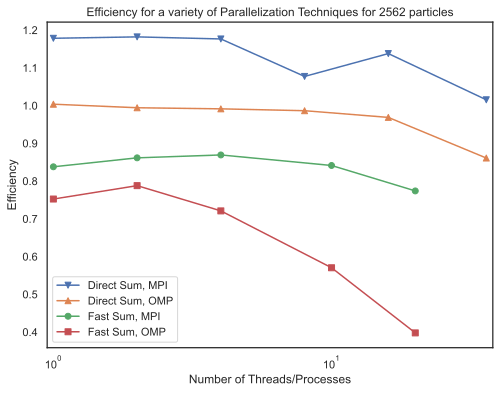

In [135]:
plt.plot(thread_counts2, direct_mpi_eff, label='Direct Sum, MPI', marker='v')
plt.plot(thread_counts2, direct_omp_eff, label='Direct Sum, OMP', marker='^')
plt.plot(thread_counts1, fast_mpi_eff, label='Fast Sum, MPI', marker='o')
plt.plot(thread_counts1, fast_omp_eff, label='Fast Sum, OMP', marker='s')
plt.xscale('log')
plt.legend()
plt.xlim(0.95, 38)
plt.xlabel('Number of Threads/Processes')
plt.ylabel('Efficiency')
plt.title("Efficiency for a variety of Parallelization Techniques for 2562 particles")
# plt.show()
plt.savefig('efficiency.png')